In [1]:
import trait2d as tr
import trait2d_minflux.minflux as mf
from trait2d_minflux.minflux import importPKL, openPKL
import pandas as pd

###Ignore a warning which is only relevant for legacy files
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#display option for my mental health
pd.set_option('display.precision',12)

### The importPKL function works well with the old format, but not with the new, so it needs to be worked around a bit

In [2]:
old = importPKL(name = 'oldformat.pkl')

In [3]:
new = importPKL(name = 'newformat.pkl')

In [4]:
from trait2d_minflux.minflux import MFTrack

for i in range(len(old)):
    xx = MFTrack.from_importPKL(old[i])

In [5]:
masso = mf.MFTrackDB.from_pkl('.','oldformat.pkl')

In [6]:
xx.get_x()

array([-2.32726616e-06, -2.33538389e-06, -2.31551050e-06, ...,
       -2.32602114e-06, -2.31655801e-06, -2.29943665e-06])

In [7]:
old[1]

{'track':                    x               y            t  tid                  frq  \
 5029 -0.000002775355  0.000004610381  7.098626400  0.0  140140.140140140138   
 5030 -0.000002782922  0.000004610746  7.098774850  0.0  220220.220220220217   
 5031 -0.000002774963  0.000004607577  7.098857125  0.0  220220.220220220217   
 5032 -0.000002780539  0.000004616699  7.098939400  0.0  210210.210210210207   
 5033 -0.000002770220  0.000004645660  7.099087825  0.0  190190.190190190187   
 ...              ...             ...          ...  ...                  ...   
 6358 -0.000002690608  0.000004621412  7.259604150  0.0  200200.200200200197   
 6359 -0.000002708997  0.000004607417  7.259686425  0.0  170170.170170170168   
 6360 -0.000002730839  0.000004606993  7.259834825  0.0  130130.130130130128   
 6361 -0.000002724075  0.000004602950  7.259983225  0.0  170170.170170170168   
 6362 -0.000002697611  0.000004606953  7.260131675  0.0  130130.130130130128   
 
              tint  
 5029  0

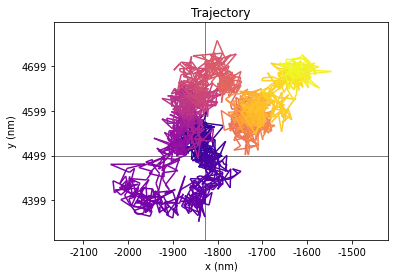

In [8]:
aaa = MFTrack.from_importPKL(old[5])
aaa.plot_trajectory()

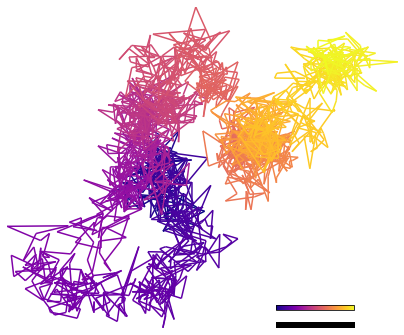

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap


fig, ax = plt.subplots(figsize = (7,7),frameon=False)
points = np.array([aaa._x,aaa._y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(aaa._t.min(),aaa._t.max(),100)
lc = LineCollection(segments, cmap='plasma',norm = norm)
line = ax.add_collection(lc)
lc.set_array(aaa._t)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cbar = fig.colorbar(line, cax=fig.add_axes([0.659, 0.22, 0.155, 0.01]), orientation = 'horizontal')
cbar.set_ticks([cbar.vmin + t*(cbar.vmax-cbar.vmin) for t in cbar.ax.get_yticks()])
cbar.set_ticklabels([t for t in cbar.ax.get_yticks()])

ax.set_xlim((aaa._x.min(),aaa._x.max()))
ax.set_ylim((aaa._y.min(),aaa._y.max()))
scalebar = mpatches.Rectangle((-1.7E-6,4.35E-6),0.1E-6,0.01E-6,facecolor='black')

ax.add_patch(scalebar)
ax.set_aspect(1.0)

In [10]:
aaa._t.max()-aaa._t.min()

0.2718573999999947

In [11]:
aaa.MF_calculate_msd(use_log = True)

100%|██████████| 660/660 [00:17<00:00, 37.92it/s]


In [12]:
from trait2d_minflux.minflux import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelHop

ModelDB().add_model(ModelHop)
ModelDB().add_model(ModelBrownian)

In [37]:
aaa.MF_adc_analysis(fraction_fit_points = 0.15, enable_log_sampling = True,log_sampling_dist =0.05,weighting = 'error');

n_points =99
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 20, 23, 26, 30, 34, 39, 44, 50, 57, 65, 74, 84, 95]


In [14]:
ModelDB().models[0]

In [28]:
aaa._adc_analysis_results['fit_results']['ModelHop']['params']

array([1.e-10, 1.e-10, 2.e-09, 1.e-03])

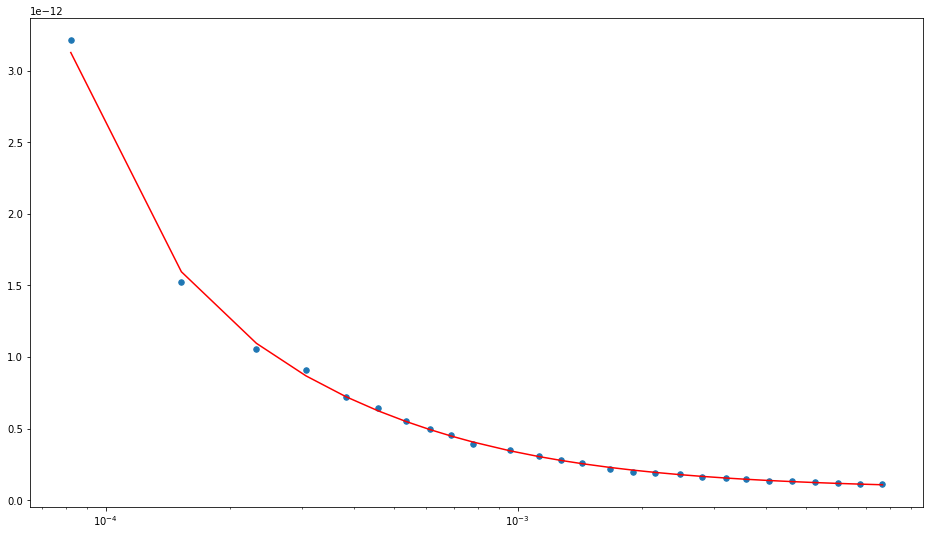

In [38]:
idxs = aaa._adc_analysis_results['fit_indices']
hop_params = aaa._adc_analysis_results['fit_results']['ModelHop']['params']

fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(aaa._tn[idxs],aaa._adc[idxs],s = 30)
ax.semilogx(aaa._tn[idxs],ModelDB.models[0](aaa._tn[idxs],*hop_params),c = 'red')